Welcome to Crypto Master!

Please indicate the time period for which you'd like the program to fetch historical price data by indicating the period in 'days', as an integer.
You will then be prompted to enter a multiplier amount.
For example, if you'd like to go back 500 days, simply enter '500' in the days prompt, followed by a multiplier of '1'.
Conversely, if you would like to go back, say, 5 years, enter '365' in the days prompt, followed by a multiplier of '5'.



Days of Historical Data:  365
Multiplier =  5



Thank you.

Now, please select 6 cryptocurrencies that will make up the portfolio for the simulation.
The program will be fetching data from Yahoo Finance, so please first make sure that the site contains historical price information for the coins that you'd like to test.
You will be prompted to select the coins one at a time. Please enter the 'ticker' for the cryptocurrency, in capital letters.
If you are unsure which to pick, or would like a suggestion, you may enter the coins that we've shortlisted with respect to each coins' market cap.
The suggestions are: 'ADA', 'SOL', 'BNB', 'XRP', 'ETH', and 'BTC'.

(If you recieve an error, it is because the coin is not available on Yahoo Finance, or it has been misspelled, so please ensure everything is correct)

You do not need to add -USD to the end of the ticker; the program will take care of that for you.



Coin 1:  ADA
Coin 2:  SOL
Coin 3:  BNB
Coin 4:  XRP
Coin 5:  ETH
Coin 6:  BTC



Awesome! Those are great choices. Here is a quick snapshot of the average returns for the portfolio:

Symbols
ADA-USD    0.003824
SOL-USD    0.006789
BNB-USD    0.004599
XRP-USD    0.002507
ETH-USD    0.002174
BTC-USD    0.001369
dtype: float64

Now, we'll determine the weightings of the portfolio.
As there are 6 coins in the portfolio, if you'd like equal weightings, simply enter '0.16' in each field.

Do not worry if the sum of all weightings does not precisely equal to 1 as the program will equally distribute the difference.



Weighting for ADA:  0.16
Weighting for SOL:  0.16
Weighting for BNB:  0.16
Weighting for XRP:  0.16
Weighting for ETH:  0.16
Weighting for BTC:  0.16



Excellent! Now we will determine the parameters for the Monte Carlo Simulation, built upon your preselected coins and weightings.
Please indicate the number of simulations you would like to run. If you have a computer of moderate speed, we recommened entering '500' into the simulations prompt.

However, if you are confident in your computers' ability, feel free to enter '1000' or more!



Number of Simulations:  500



Great! Similar to before, you will now be prompted to enter the projection delta in days, followed by the multiplier.
For example, if you would like a 500 day projection, enter '500' in the days prompt, followed by '1' as the multiplier.
Conversely, if you would like the projection to extend 5 years into the future, enter '365' into the days prompt, followed by '5' as the multiplier.



Days to Simulate into the Future:  500
Multiplier =  1



Nicely done, we're almost there!

Finally, please enter the initial dollar amount (in USD) that you would like to assign to this portfolio.



Initial Portfolio Amount: USD$ 10000



DONE. The program will now present a summary of your initial conditions, followed by a Monte Carlo Simulation and details of the 95% confidence interval.


-----------------------------------------------------------------------------------------------------------------------------------------------------
SUMMARY OF INITIAL CONDITIONS
-----------------------------------------------------------------------------------------------------------------------------------------------------
Initial Portfolio Value = $10000.0
Coins:
ADA, SOL, BNB, XRP, ETH, BTC
Historical data for the simulation spans back 365 days, times 5, (or 1825 Days / 5.0 Years).
Monte Carlo Simulation is forecasting to 500 days, times 1 into the future, (or 500 Days / 1.37 Years).
Projection includes 500 simulations.
-----------------------------------------------------------------------------------------------------------------------------------------------------



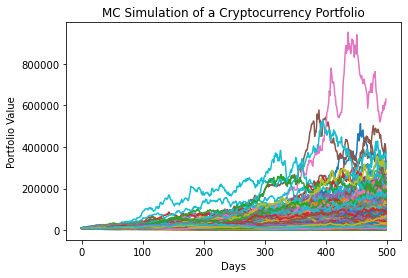


-----------------------------------------------------------------------------------------------------------------------------------------------------
RESULT INCLUDING 95% CONFIDENCE INTERVAL OF PROBABILITY DISTRIBUTION
-----------------------------------------------------------------------------------------------------------------------------------------------------
There is a 95% chance that the value of the portfolio will be between $4448.74 and $127789.01 at the end of the investment period of 500 Days.
-----------------------------------------------------------------------------------------------------------------------------------------------------


In [55]:
# Initial Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr

# Ask user to determine the time delta for which the program will fetch data regarding the historical cryptyocurrency closing prices

print ("Welcome to Crypto Master!")
print ()
print ("Please indicate the time period for which you'd like the program to fetch historical price data by indicating the period in 'days', as an integer.")
print ("You will then be prompted to enter a multiplier amount.")
print ("For example, if you'd like to go back 500 days, simply enter '500' in the days prompt, followed by a multiplier of '1'.")
print ("Conversely, if you would like to go back, say, 5 years, enter '365' in the days prompt, followed by a multiplier of '5'.")
print ()

historical_crypto_data_time_delta_days = input ("Days of Historical Data: ") # input historical data delta in days

historical_crypto_data_time_delta_multiplier = input ("Multiplier = ") # input multiplier

print ()
print ("Thank you.")

# Convert inputs to integers

historical_crypto_data_time_delta_days = int(historical_crypto_data_time_delta_days) # days input converted to an integer from a string

historical_crypto_data_time_delta_multiplier = int(historical_crypto_data_time_delta_multiplier) # years input converted to an integer from a string

# Import the data

# Define the 'get_data' function
def get_data(cryptos, start, end):
    cryptoData = pdr.get_data_yahoo(cryptos, start, end) # grabs cryptocurrency data from Yahoo finance
    cryptoData = cryptoData["Close"] # focus on the 'Close' prices column
    returns = cryptoData.pct_change() # compute daily return
    meanReturns = returns.mean() # compute mean returns
    covMatrix = returns.cov() # compute covariance matrix
    return meanReturns, covMatrix

# Ask user to select 6 cryptocurencies that are available on Yahoo Finance, with a recommendation of which one's they may potentially pick

print ()
print ("Now, please select 6 cryptocurrencies that will make up the portfolio for the simulation.")
print ("The program will be fetching data from Yahoo Finance, so please first make sure that the site contains historical price information for the coins that you'd like to test.")
print ("You will be prompted to select the coins one at a time. Please enter the 'ticker' for the cryptocurrency, in capital letters.")
print ("If you are unsure which to pick, or would like a suggestion, you may enter the coins that we've shortlisted with respect to each coins' market cap.")
print ("The suggestions are: 'ADA', 'SOL', 'BNB', 'XRP', 'ETH', and 'BTC'.")
print ()
print ("(If you recieve an error, it is because the coin is not available on Yahoo Finance, or it has been misspelled, so please ensure everything is correct)")
print ()
print ("You do not need to add -USD to the end of the ticker; the program will take care of that for you.")
print ()

# Input coins

cryptoCoin_1 = input ("Coin 1: ")
cryptoCoin_2 = input ("Coin 2: ")
cryptoCoin_3 = input ("Coin 3: ")
cryptoCoin_4 = input ("Coin 4: ")
cryptoCoin_5 = input ("Coin 5: ")
cryptoCoin_6 = input ("Coin 6: ")

# Identify the Cryptocurrencies for the Portfolio
cryptoList = [cryptoCoin_1, cryptoCoin_2, cryptoCoin_3, cryptoCoin_4, cryptoCoin_5, cryptoCoin_6]
cryptos = [crypto + "-USD" for crypto in cryptoList] # adds string '-USD' which correlates to ticker in Yahoo Finance
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = historical_crypto_data_time_delta_days*historical_crypto_data_time_delta_multiplier) # defines length of time for which price history is fetched

# Check program is grabbing data correctly

print ()
print ("Awesome! Those are great choices. Here is a quick snapshot of the average returns for the portfolio:")
print ()

meanReturns, covMatrix = get_data(cryptos, startDate, endDate)

print(meanReturns)

# Ask user to determine the weights for the portfolio from the 6 possible cryptocurrencies

print ()
print ("Now, we'll determine the weightings of the portfolio.")
print ("As there are 6 coins in the portfolio, if you'd like equal weightings, simply enter '0.16' in each field.")
print ()
print ("Do not worry if the sum of all weightings does not precisely equal to 1 as the program will equally distribute the difference.")
print ()

# Ask user to determine weightings for each coin

coin_weighting_1 = input (f"Weighting for {cryptoCoin_1}: ")
coin_weighting_2 = input (f"Weighting for {cryptoCoin_2}: ")
coin_weighting_3 = input (f"Weighting for {cryptoCoin_3}: ")
coin_weighting_4 = input (f"Weighting for {cryptoCoin_4}: ")
coin_weighting_5 = input (f"Weighting for {cryptoCoin_5}: ")
coin_weighting_6 = input (f"Weighting for {cryptoCoin_6}: ")

# Convert weightings to floats

coin_weighting_1 = float (coin_weighting_1)
coin_weighting_2 = float (coin_weighting_2)
coin_weighting_3 = float (coin_weighting_3)
coin_weighting_4 = float (coin_weighting_4)
coin_weighting_5 = float (coin_weighting_5)
coin_weighting_6 = float (coin_weighting_6)

# Define portfolio weights

weights = coin_weighting_1, coin_weighting_2, coin_weighting_3, coin_weighting_4, coin_weighting_5, coin_weighting_6 # 6 weights as 6 cryptocurrencies have been chosen
weights /= np.sum(weights) # ensure sum of weights is equal to 1

# Ask user to determine the parameters for the Monte Carlo Simulation, using the preselected coins and weightings

print ()
print ("Excellent! Now we will determine the parameters for the Monte Carlo Simulation, built upon your preselected coins and weightings.")
print ("Please indicate the number of simulations you would like to run. If you have a computer of moderate speed, we recommened entering '500' into the simulations prompt.")
print ()
print ("However, if you are confident in your computers' ability, feel free to enter '1000' or more!")
print ()

input_simulations = input ("Number of Simulations: ")

# Convert input of amount of simulations to an integer

input_simulations = int(input_simulations)

# Ask user to determine the future time delta in days, along with the multiplier if they'd like to project many years forward

print ()
print ("Great! Similar to before, you will now be prompted to enter the projection delta in days, followed by the multiplier.")
print ("For example, if you would like a 500 day projection, enter '500' in the days prompt, followed by '1' as the multiplier.")
print ("Conversely, if you would like the projection to extend 5 years into the future, enter '365' into the days prompt, followed by '5' as the multiplier.")
print ()

monteCarlo_projection_days = input ("Days to Simulate into the Future: ")

monteCarlo_projection_days_multiplier = input ("Multiplier = ")

# Convert projection days and multiplier inputs into integers

monteCarlo_projection_days = int(monteCarlo_projection_days)

monteCarlo_projection_days_multiplier = int(monteCarlo_projection_days_multiplier)

# Ask user to assign an initial dollar amount in USD to the portfolio

print ()
print ("Nicely done, we're almost there!")
print ()
print ("Finally, please enter the initial dollar amount (in USD) that you would like to assign to this portfolio.")
print ()

initialPortfolio_input = input ("Initial Portfolio Amount: USD$")

print ()
print ("DONE. The program will now present a summary of your initial conditions, followed by a Monte Carlo Simulation and details of the 95% confidence interval.")
print ()

# Convert initial portfolio input from string to float

initialPortfolio_input = float (initialPortfolio_input)

# Monte Carlo Method

mc_sims = input_simulations # number of simulations

T = monteCarlo_projection_days*monteCarlo_projection_days_multiplier # timeframe in days

meanM = np.full(shape = (T, len(weights)), fill_value = meanReturns) # sets up mean returns matrix

meanM = meanM.T # transpose of the matrix, in order to compute the below

portfolio_sims = np.full(shape = (T, mc_sims), fill_value = 0.0) # array in which to store the information

initialPortfolio = initialPortfolio_input # initial portfolio value ($)

for m in range (0, mc_sims): # monte Carlo Simulation Loops
    Z = np.random.normal(size = (T, len(weights))) # sample of uncorrelated variables from normal distribution
    L = np.linalg.cholesky(covMatrix) # correlate variables with covariance matrix
    dailyReturns = meanM + np.inner(L, Z) # formula for daily returns
    # record portfolio daily returns and then accumulate them accross days
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T) + 1)*initialPortfolio

# Display a summary of the initial conditions that the user has input into the program
    
print ()
print ("-----------------------------------------------------------------------------------------------------------------------------------------------------")
print ("SUMMARY OF INITIAL CONDITIONS")
print ("-----------------------------------------------------------------------------------------------------------------------------------------------------")
print (f"Initial Portfolio Value = ${initialPortfolio_input}")
print ("Coins:")
print (f"{cryptoCoin_1}, {cryptoCoin_2}, {cryptoCoin_3}, {cryptoCoin_4}, {cryptoCoin_5}, {cryptoCoin_6}")
print (f"Historical data for the simulation spans back {historical_crypto_data_time_delta_days} days, times {historical_crypto_data_time_delta_multiplier}, (or {historical_crypto_data_time_delta_days*historical_crypto_data_time_delta_multiplier} Days / {round(historical_crypto_data_time_delta_days*historical_crypto_data_time_delta_multiplier/365, 2)} Years).")
print (f"Monte Carlo Simulation is forecasting to {monteCarlo_projection_days} days, times {monteCarlo_projection_days_multiplier} into the future, (or {monteCarlo_projection_days*monteCarlo_projection_days_multiplier} Days / {round(monteCarlo_projection_days*monteCarlo_projection_days_multiplier/365, 2)} Years).")
print (f"Projection includes {input_simulations} simulations.")
print ("-----------------------------------------------------------------------------------------------------------------------------------------------------")
print ()

# Plot the final Monte Carlo Simulation!

plt.plot(portfolio_sims) # plot the portfolio simulations
plt.ylabel("Portfolio Value") # designate y label of graph
plt.xlabel("Days") # designate x label of graph
plt.title("MC Simulation of a Cryptocurrency Portfolio") # graph title
plt.show() # call the graph

# Calculate and present the result including the confidence interval

confidence_interval_1 = round(np.percentile(portfolio_sims, 2.5), 2)
confidence_interval_2 = round(np.percentile(portfolio_sims, 97.5), 2)

print ()
print ("-----------------------------------------------------------------------------------------------------------------------------------------------------")
print ("RESULT INCLUDING 95% CONFIDENCE INTERVAL OF PROBABILITY DISTRIBUTION")
print ("-----------------------------------------------------------------------------------------------------------------------------------------------------")
print (f"There is a 95% chance that the value of the portfolio will be between ${confidence_interval_1} and ${confidence_interval_2} at the end of the investment period of {monteCarlo_projection_days*monteCarlo_projection_days_multiplier} Days.")
print ("-----------------------------------------------------------------------------------------------------------------------------------------------------")